In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

In [2]:
HappinessScore = pd.read_csv(r"C:\Users\USER\Desktop\HS score\data\World Happiness Report 2022.csv")

In [3]:
HappinessScore = HappinessScore.iloc[:, 2:]
HappinessScore

,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,7.821,7.886,7.756,2.518,1.892,1.258,0.775,0.736,0.109,0.534
1,7.636,7.710,7.563,2.226,1.953,1.243,0.777,0.719,0.188,0.532
2,7.557,7.651,7.464,2.320,1.936,1.320,0.803,0.718,0.270,0.191
3,7.512,7.586,7.437,2.153,2.026,1.226,0.822,0.677,0.147,0.461
4,7.415,7.471,7.359,2.137,1.945,1.206,0.787,0.651,0.271,0.419
...,...,...,...,...,...,...,...,...,...,...
141,3.471,3.667,3.275,0.187,1.503,0.815,0.280,0.571,0.012,0.102
142,3.268,3.462,3.074,0.536,0.785,0.133,0.462,0.621,0.187,0.544
143,2.995,3.110,2.880,0.548,0.947,0.690,0.270,0.329,0.106,0.105
144,2.955,3.049,2.862,0.216,1.392,0.498,0.631,0.103,0.082,0.034


In [4]:
X = HappinessScore.iloc[:, 1:].values
y = HappinessScore.iloc[:, 1].values

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 0)

In [6]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [7]:
from xgboost import XGBRegressor

regressor = XGBRegressor()
regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [8]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)

print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[7.29 7.44]
 [6.57 6.64]
 [6.51 6.58]
 [4.74 4.63]
 [3.69 3.46]
 [6.19 6.18]
 [6.24 6.26]
 [6.77 6.68]
 [4.95 4.81]
 [6.45 6.57]
 [6.33 6.32]
 [5.64 5.61]
 [4.51 4.37]
 [6.01 6.02]
 [5.69 5.65]
 [5.36 5.26]
 [6.95 7.02]
 [6.2  6.19]
 [5.28 5.24]
 [7.28 7.43]
 [5.39 5.32]
 [6.33 6.38]
 [4.94 4.75]
 [5.55 5.49]
 [2.47 3.05]
 [6.47 6.54]
 [2.47 3.11]
 [5.38 5.32]
 [5.55 5.5 ]
 [5.17 5.09]]


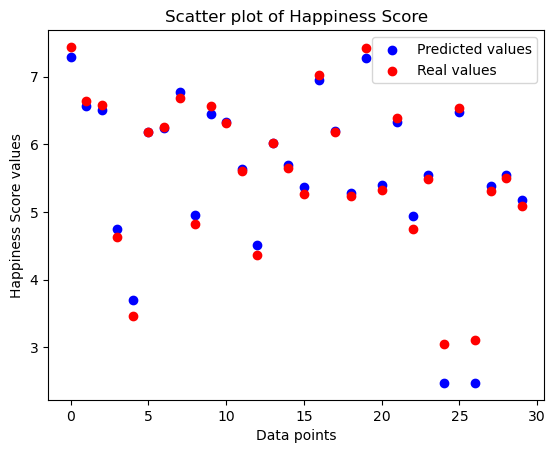

In [9]:
plt.scatter(range(len(y_pred)), y_pred, color='blue', label='Predicted values')
plt.scatter(range(len(y_test)), y_test, color='red', label='Real values')
plt.xlabel('Data points')
plt.ylabel('Happiness Score values')
plt.title('Scatter plot of Happiness Score')
plt.legend()
plt.show()

In [11]:
import joblib
joblib.dump(regressor, r'C:\Users\USER\Desktop\HS score\models\xgboost_model.pkl')

['C:\\Users\\USER\\Desktop\\HS score\\models\\xgboost_model.pkl']